# Introducing Scikit-Learn
https://nbviewer.jupyter.org/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.02-Introducing-Scikit-Learn.ipynb

In [1]:
%matplotlib inline
# Seaborn makes matplots prettier
import seaborn as sns; sns.set()

## Load Iris dataset
And then show the first 5 items. Dataset is Built in from seaborn

In [2]:
iris = sns.load_dataset('iris')
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

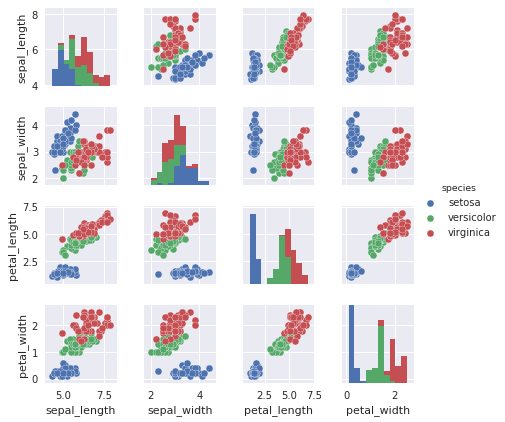

In [3]:
# Adding semi-colon prevents code output being displayed
sns.pairplot(iris, hue='species', size=1.5);

In [4]:
# Seeing what's what
# print("=== About the Iris Table ===\n")
# print("Axis 0:\t",iris.axes[0])
# print("Axis 1:\t",iris.axes[1])
# print("Shape:\t",iris.shape)
# print("Type:\t",type(iris))

# import sklearn.datasets as datasets
# d = datasets.load_iris()
# print(d.DESCR)

## Define dataset without index
i.e. just the numbers that define the iris type, not the label

In [5]:
# Axis 1 is index, i.e. the name of the iris type
# iris.drop deletes
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

## Define Index

In [6]:
y_iris = iris['species']
y_iris.shape

(150,)

## Training the Model
Using Gaussian naive Bayes generative model. This model is fast and has many hyperparameters we can choose. It makes a good baseline classification.

We'll split the data into a *training set* and a *testing set*, and we can use train_test_split utility function to do that.

In [7]:
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state = 1)

Now we've arranged the data, we can follow our recipe to predict the labels:

In [9]:
# Choose model class
from sklearn.naive_bayes import GaussianNB

# Instantiate model
model = GaussianNB()

# Fit model to data
model.fit(Xtrain, ytrain)

# Predict on new data
y_model = model.predict(Xtest)

Now we can use accuracy_score utility to see fraction of predicted labels that match their true value

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

## Reducing Dimensionality
We want to visualize the data better. Let's reduce the complexity of the data. 

Right now, the data is 4-dimensional - i.e. 4 features recorded for each sample. Let's try to reduce those dimensions, since it's easier to visualize data in fewer dimensions.

We'll use principal component analysis (PCA) which is a fast linear dimensionality reduction technique. We'll ask it for a 2D representation of the data, instead of the 4D we have now.

In [18]:
# Choose model class
from sklearn.decomposition import PCA

# Instantiate the model with hyperparameters
model = PCA(n_components=2)

# Fit to data. Notice y is not specified!
model.fit(X_iris)

# Transform data to 2D
X_2D = model.transform(X_iris)

Now let's plot results

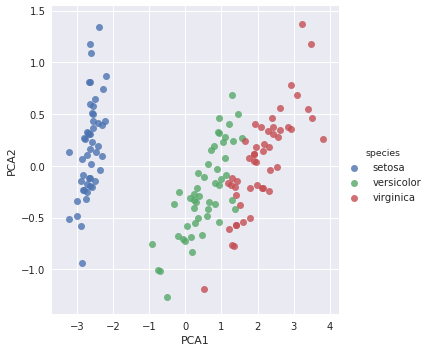

In [24]:
iris['PCA1'] = X_2D[:, 0] # Choose everything in axis 0
iris['PCA2'] = X_2D[:, 1] # choose everything in axis 1
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

We can see the species are fairly well separated, even though PCA algorithm didn't know about the species labels! So this shows a relatively straightforward classification will work on the dataset, as we saw before.

## Unsupervised Learning: Iris Clustering
Let's cluster the data. A clustering algorithm tries to find distinct groups of data with looking at labels.

We'll use Gaussian mixture model (GMM). A GMM tries to model data as a collection of gaussian blobs.

In [41]:
# Choose model class
from sklearn.mixture import GMM

# Instantiate with hyperparameters. 3 n_components because 3 species(?)
model = GMM(n_components=3, covariance_type = 'full')

# Fit to data. y (ie. label) is not specified!
model.fit(X_iris)

# Determine cluster labels
y_gmm = model.predict(X_iris)

Like before, we'll add the cluster label to the Iris DataFrame, and use Seaborn to plot the results

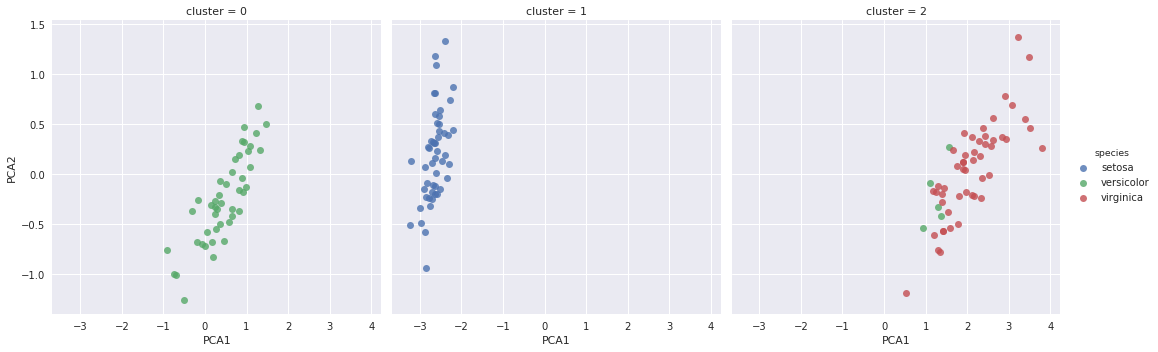

In [49]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1", 'PCA2', data=iris, hue='species', col='cluster', fit_reg=False);

From the above splitting data by cluster number, we see how well the GMM algorithm has recovered the underlying label.